# Train the Agent if Necessary

Run the cell below to train the agent, or skip it to just used the saved model weights. If you train the agent, you will have to restart the kernel afterward because of https://github.com/Unity-Technologies/ml-agents/issues/1167

The trainer uses DDGP with actor and critic networks both with two hidden layers of 128 nodes with ReLu activations. The actor network uses batchnorm after both the first and second layers. Gradient clipping is applied to the critic network.

* BATCH_SIZE = 128        # minibatch size
* BUFFER_SIZE = int(1e5)  # replay buffer size
* GAMMA = 0.99            # discount factor
* TAU = 1e-3              # for soft update of target parameters
* LR_ACTOR = 1e-4         # learning rate of the actor
* LR_CRITIC = 1e-4        # learning rate of the critic
* WEIGHT_DECAY = 0        # L2 weight decay
* OU_THETA = 0.15         # Ornstein-Uhlenbeck noise theta
* OU_SIGMA = 0.01         # Ornstein-Uhlenbeck noise sigma


In [1]:
#%run ./DDGPTrainer.py

# Agent Visualization

-----
### Setup the Environment

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import DDGPTrainer
import torch
import pickle

Using GPU :-)


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="Reacher_Linux/Reacher.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)


### Load the Saved Model and Visualize the Agent

#### Plot the training scores

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


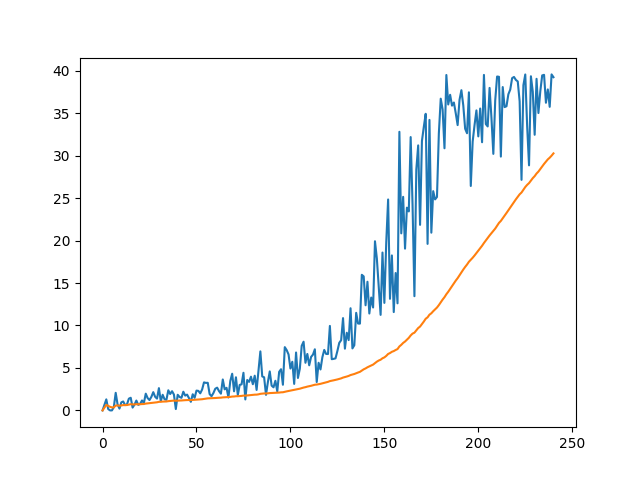

In [6]:
scores = pickle.load(open("reacher_scores.pkl", "rb"))
plt.plot(scores["scores"])
plt.plot(scores["avg_scores"])

In [7]:
agent = DDGPTrainer.Agent(state_size=state_size, action_size=action_size, random_seed=2)
agent.actor_local.load_state_dict(torch.load("actor.torch"))
agent.critic_local.load_state_dict(torch.load("critic.torch"))

In [8]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 39.35999912023544


When finished, you can close the environment.

In [9]:
env.close()

### Future work

Future work could include training in the multi-agent environment or using a non-actor-critic algorithm like PPO.